In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn. metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [15]:
abt = pd.read_csv('analytical_base_table.csv')

In [16]:
y = abt.status

X= abt.drop('status', axis=1)
abt.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=abt.status)
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


In [18]:
pipelines = { 'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)), 
            'l2': make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', random_state=123)),
            'rf': make_pipeline(StandardScaler(),  RandomForestClassifier(random_state=123)),
             'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
            }

In [19]:
pipelines['l1'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='warn',
             n_jobs=None, penalty='l1', random_state=123, solver='warn',
             tol=0.0001, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisti

In [20]:
#l1 hyperparameters
l1_hyperparameters={
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

#l2 Hyperparameters
l2_hyperparameters={
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

In [21]:
rf_hyperparameters={
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

In [25]:
gb_hyperparameters={
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

In [26]:
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb':gb_hyperparameters,
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
}

In [27]:
fitted_models = {}

#Loop through model pipelines tuning each one and saving it to fitted_model
for name, pipeline in pipelines.items():
    #create cross validation object from pipeline and hyperparameters
    model= GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #fit model in X_train y_train
    model.fit(X_train, y_train)
    
    #store model in fitted_model
    fitted_models[name]= model
    
    #print (name) has been fitted
    print(name, 'has been fitted')

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1 has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted


In [28]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.8493868846632309
l2 0.8493868846632309
rf 0.979651679402879
gb 0.9752088146436823


In [29]:
pred = fitted_models['l1'].predict(X_test)
print(pred[:10])

[0 0 0 0 0 0 0 1 1 0]


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [30]:
print(confusion_matrix(y_test, pred))

[[1969  172]
 [ 220  453]]


In [31]:
pred = fitted_models['l1'].predict_proba(X_test)

pred = [p[1] for p in pred]

print(np.round(pred[:10], 2))

[0.03 0.   0.01 0.09 0.07 0.48 0.13 0.62 0.73 0.14]


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [32]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

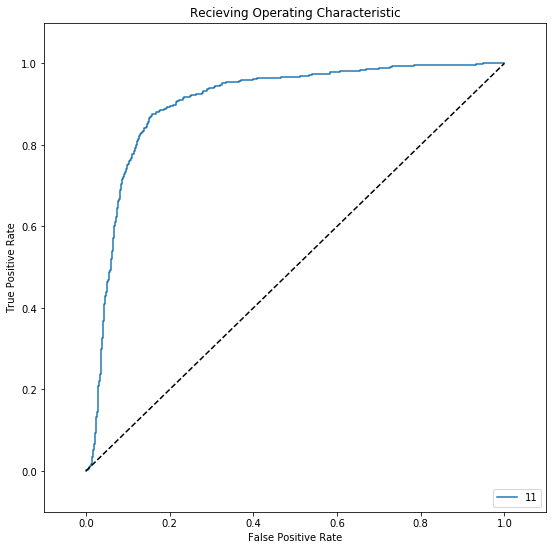

In [33]:
fig = plt.figure(figsize=(9,9))
plt.title('Recieving Operating Characteristic')

plt.plot(fpr, tpr, label='11')
plt.legend(loc='lower right')

plt.plot([0,1], [0,1], 'k--')

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
print(roc_auc_score(y_test, pred))

0.9015430014581236


In [35]:
for name, model in fitted_models.items():
    pred= model.predict_proba(X_test)
    pred= [p[1] for p in pred]
    
    print(name, roc_auc_score(y_test, pred))

l1 0.9015430014581236
l2 0.9015367553315895
rf 0.9915194952019338
gb 0.9886802836851869


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [36]:
with open ('final_model.pk1', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)